NOTE: English is not my first language so sorry for any error. 


# Table of Contents:

**1. [Objective and Introduction](#Introduction)** <br>
**2. [Librarys](#Librarys)** <br>
**3. [First Look](#Known)** <br>
**4. [Explorations](#Explore)** <br>
**5. [Observations](#Observations)** <br>
**6. [EDA Flavors and Effects](#FlavandEffect)** <br>
**7. [Preprocessing](#Preprocess)** <br>
**8. [Modeling](#Modeling)** <br>
**9. [Evaluation](#Evaluation)** <br>

<b>Let's start this Analysis.</b>



# **1. Introduction:** <a id="Introduction"></a> <br> 


<h3>This exploration wants discover the effects and flavors related to cananbis types. I will use the Rating column as guide to exploration.</h3>

<b><h1>Introduction</h1></b>

<b>Cannabis</b>, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

Cannabis is often used for its <b>mental and physical effects</b>, such as a <b>"high" or "stoned" </b>feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.

<h1>We will try understand the data set with questions like this</h1>
- Are the Species distribuition of our dataset equal?
- The all types of strains have the same rating distribuition?
- Whats the first word in description to each species? 
- Are the Flavor important to the rating ?
- Are the Effect important to the rating? 
- Are some difference in Effects and Flavors related by specie? 



## <font color="red">Please, if think the kernel useful <b>UPVOTE</b> the kernel and give me your feedback =)</font>

Let's start work on this amazing dataset



<a id="Librarys"></a> <br> 
# **2. Librarys and import:** 

In [1]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math 

plt.style.use('ggplot') # to plot graphs with gggplot2 style

# To NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

In [2]:
#Reading the dataset on pandas
strains = pd.read_csv("../input/cannabis.csv")

<a id="Known"></a> <br> 
# **3. Knowning the Data:** 

In [3]:
# Veryfing the shape, if have any null numbers and looking how the data is
print(strains.shape)
print(strains.isnull().sum())
print(strains.info())
strains.head(n=6)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...


In [4]:
strains['Type'] = strains.Type.astype(str)
#Here looking though the data to see the structure
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


<a id="Explore"></a> <br> 
# **4. Data Exploration:** 

## Distribution of Species (Types)
We have 3 principal type of cannabis:
- Indicas
- Sativas
- Hybrid


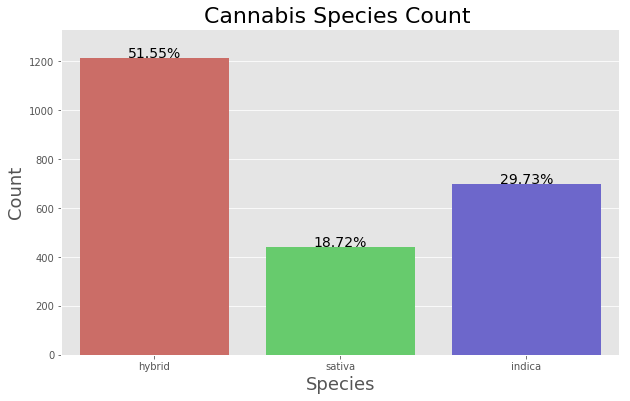

In [5]:
#First, I will look the distribuition of Types
total = len(strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count ", fontsize=22)
g.set_xlabel('Species', fontsize=18)
g.set_ylabel('Count', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()


We can see that 

<h2>Looking the distribuition of Rating and type by Rating</h2>

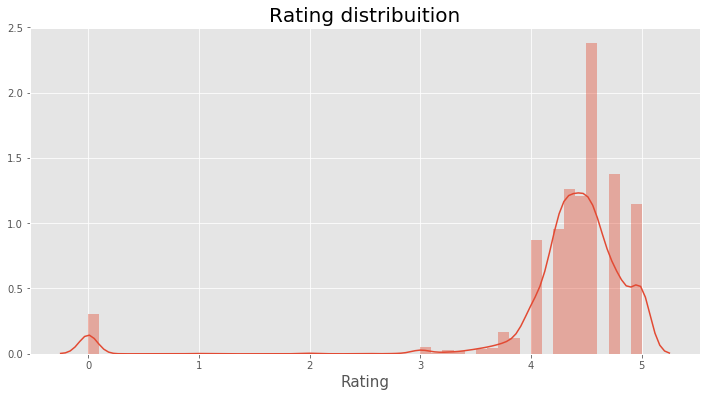

In [6]:
plt.figure(figsize=(12,6))

#Total rating distribuition
g = sns.distplot(strains["Rating"],
                 bins=50)
g.set_title("Rating distribuition", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

Almost all species have rating higher than 4<br>

Now I will Look the distribuition separted by Species

## Descriptive Rating by Cannabis Species

In [7]:
print("Rating Distribuition by Species Type")
pd.crosstab(strains[strains.Rating > 3.0]['Rating'], strains.Type).T


Rating Distribuition by Species Type


Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


Cool!! As more than 50% strains are hybrids we can see that hybrids are dominating almost all ratings values. 

## Visualizing Rating Distribution by Different Species
- I think that visualizations are the better way to build a instuition about our data. So Let's plot the distributions by Species. 

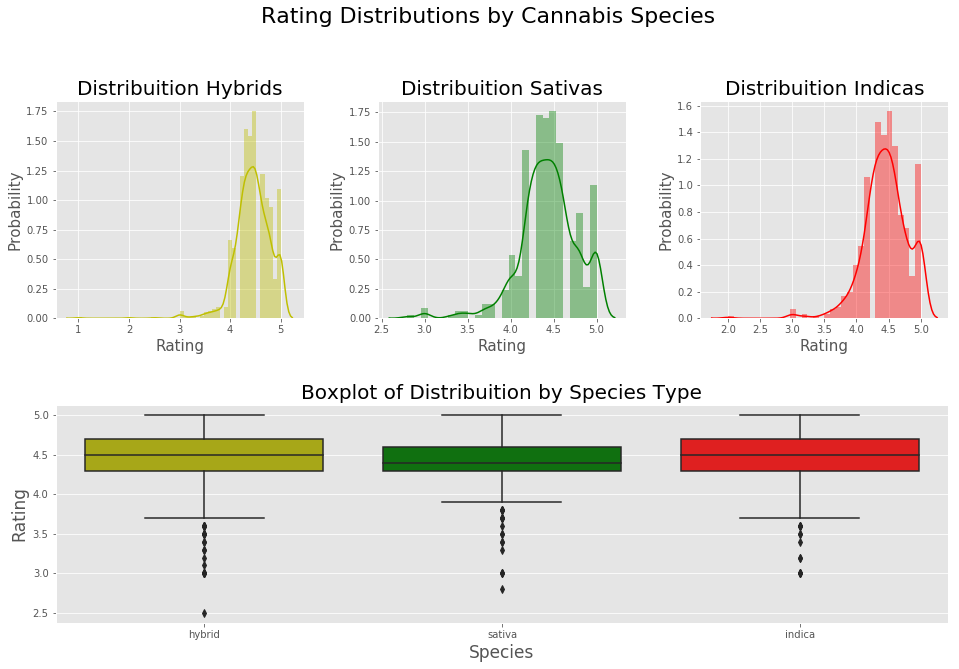

In [8]:
plt.figure(figsize=(16,10))

plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribuition Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

#I will now explore the Rating distribuition by Type
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

<h1>Reggae colors looks nice on this dataset LOL :D</h1>

Sativa and Indica have a similar rating distribuition, and we can see that almost of all species in dataset have rating higher than 4. <br>
The Sativa rating is slightly small than Hybrids and Indicas. 

# Getting Effects of Strains

In [9]:
#I will extract the values in Effects and Flavor and pass to a new column
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [10]:
#Concatenating the new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

#Looking the result
strains.head()

strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

We can se the Effects and Flavors are in separated columns... Now I will explore the main related effects

<h1>The first most related effects and respective Rating

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


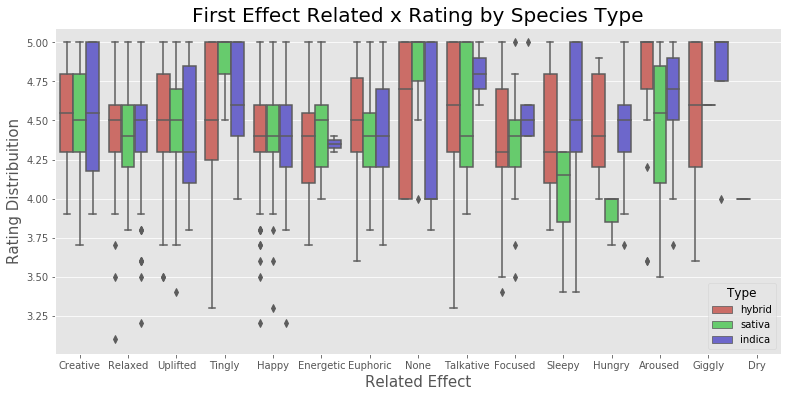

In [11]:
print("The top 5 First Effects related")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

Cool!!! For example, we can note that Indica's with talkative effects, has highest mean than other species.

<h1>The second most related effects and respective Rating

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


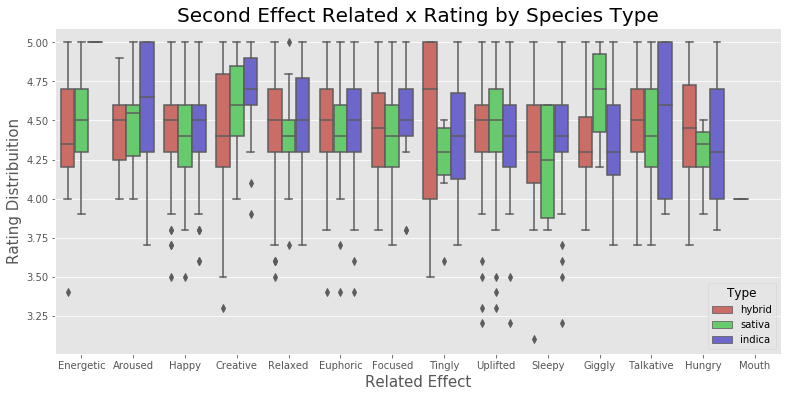

In [12]:
print("The top 5 Second related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

<h1>Now let's see the first Flavor related  </h1><br>
- We have 33 flavors in total

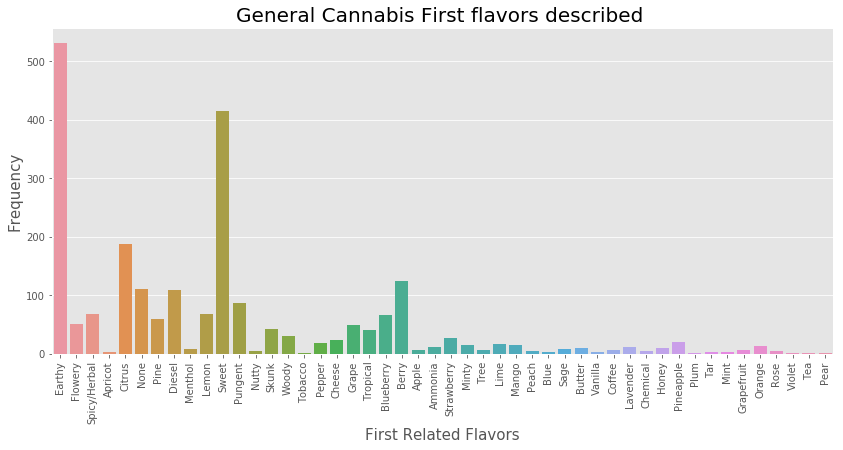

In [13]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('First Related Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("General Cannabis First flavors described ",
          fontsize=20)
plt.show()

<h1>Let's explore the Strains with Rating 5

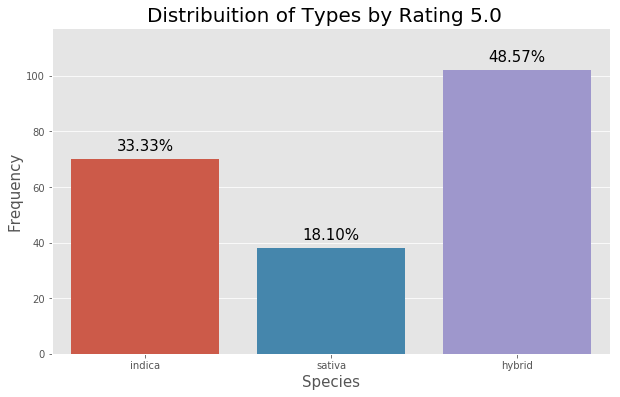

In [14]:
#Whats the type with most strains with rating 5?
total_rat5 = len(strains[strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()

cool! We can compare the strains with rating equal 5 to the distribution of the species... <br>
- 51.55% of hybrids in our dataset, and 48.5% of strains with rating 5.  <br>
- 18.72% of sativas in our dataset, and 18.10% of strains with rating 5.  <br>
- 29.73% of indica in our dataset, and 33.33% of strains with rating 5.  <br>

Altought we have similar percentual to each category, maybe we can infer that indica's has a better quality in general. 

<h2>Exploring the principal effects and Flavors Related in Rating five strains</h2>

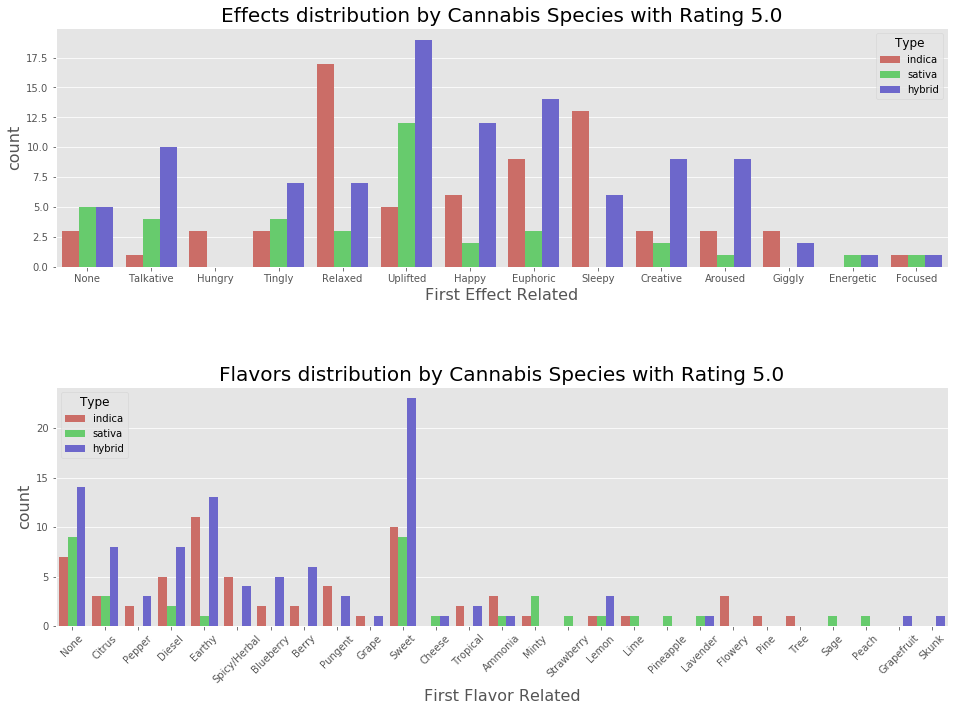

In [15]:
strains_top = strains[strains["Rating"] == 5]

plt.figure(figsize=(16,11))

plt.subplot(211)
g = sns.countplot(x ='Effect_1',data = strains_top,hue="Type",
              palette='hls')
g.set_title("Effects distribution by Cannabis Species with Rating 5.0", fontsize=20)
g.set_xlabel('First Effect Related', fontsize=16)
g.set_ylabel('count', fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",
              palette='hls')
g1.set_title("Flavors distribution by Cannabis Species with Rating 5.0", fontsize=20)
g1.set_xlabel('First Flavor Related', fontsize=16)
g1.set_ylabel('count', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()

<b> Curious! </b> <br>
We can see that in all types, the most related flavors are Sweet and Earthly. <br>
Is important to remember that we have alot of another flavors that are related with this Sweet and Earthly tastes. <br>

We can also remember that the first cannabis strain was Skunk #1, that have a high earthly and pungent taste. <br>

The distribuition total of data set is almost nearly of this values: <br>
- hybrid    51.55
- indica    29.73
- sativa    18.72

Now I will Explore the total Effects and Flavors related to each strain

In [16]:
#Let's create subsets by each type and explore their Flavors and Effects
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [17]:
#Now we can delete some columns that will not be useful
del strains["Effects"]
del strains["Flavor"]

In [18]:
#Creating the spliter -- by LiamLarsen -- 
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

# 5. Sativas effects

In [19]:
#Runing flavors counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

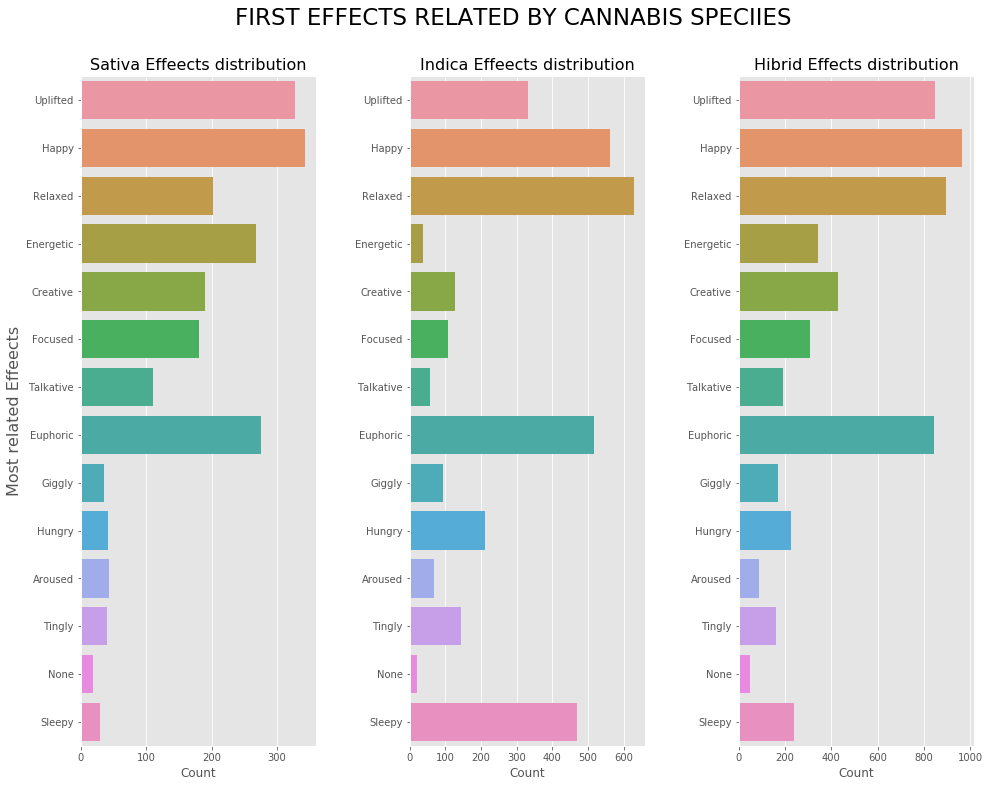

In [20]:
plt.figure(figsize=(16,12))

plt.suptitle('FIRST EFFECTS RELATED BY CANNABIS SPECIIES', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related Effeects", fontsize=16)
g.set_title("Sativa Effeects distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica Effeects distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid Effects distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

<h2>Some observations:</h2>  <br> 
We can clearly see that Happy, Uplified, Relaxed, Euphoric have a high ranking at all 3 types <br>
<br>
Its interesting that almost 350 people of 440 in <b>Sativas</b> related Happy and Uplifted Effects <br> 
- 'Happy': 342<br> 
- 'Uplifted': 328<br> 
- 'Euphoric': 276<br> 
- 'Energetic': 268<br> 

78% has described Happy to Sativas strains<br>
 
<b>Indicas</b> we have 699 votes and Relaxed with most frequency at distribuition:  <br> 
- 'Relaxed': 628<br> 
- 'Happy': 562<br> 
- 'Euphoric': 516<br> 
- 'Sleepy': 468 <br>

90% has described Relaxed to Indica strains <br>

<b>Hybrids</b> We have 1212 votes and distribuition of effects is 
- 'Happy': 967
- 'Relaxed': 896
- 'Uplifted': 848
- 'Euphoric': 843

80% has described Happy and 74% related Relaxed to Hybrids strains <br>
<b>Very Interesting!</b>        
<br>
We also need to remember that's possible to vote in more than 1 effect or flavor in each vote. 

<a id="FlavandEffect"></a> <br> 
# **6. Exploring general Flavors and Effects:** 

<h2>Now, let's check the flavors <br></h2>
I will use the same loop to known the most related flavors

In [21]:
#Creating flavors to cut each flavor by row -- inspired in LiamLarsen --
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

<h2>Sativas Flavors</h2>

In [22]:
#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(sativa_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_flavors = flavors(indicas)
indica_flavors = pd.DataFrame.from_dict(indica_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)
hibridas_flavors = pd.DataFrame.from_dict(hibridas_flavors,
                                          orient='index').reset_index().rename(columns={'index': 'flavors',
                                                                                        0:'count'})

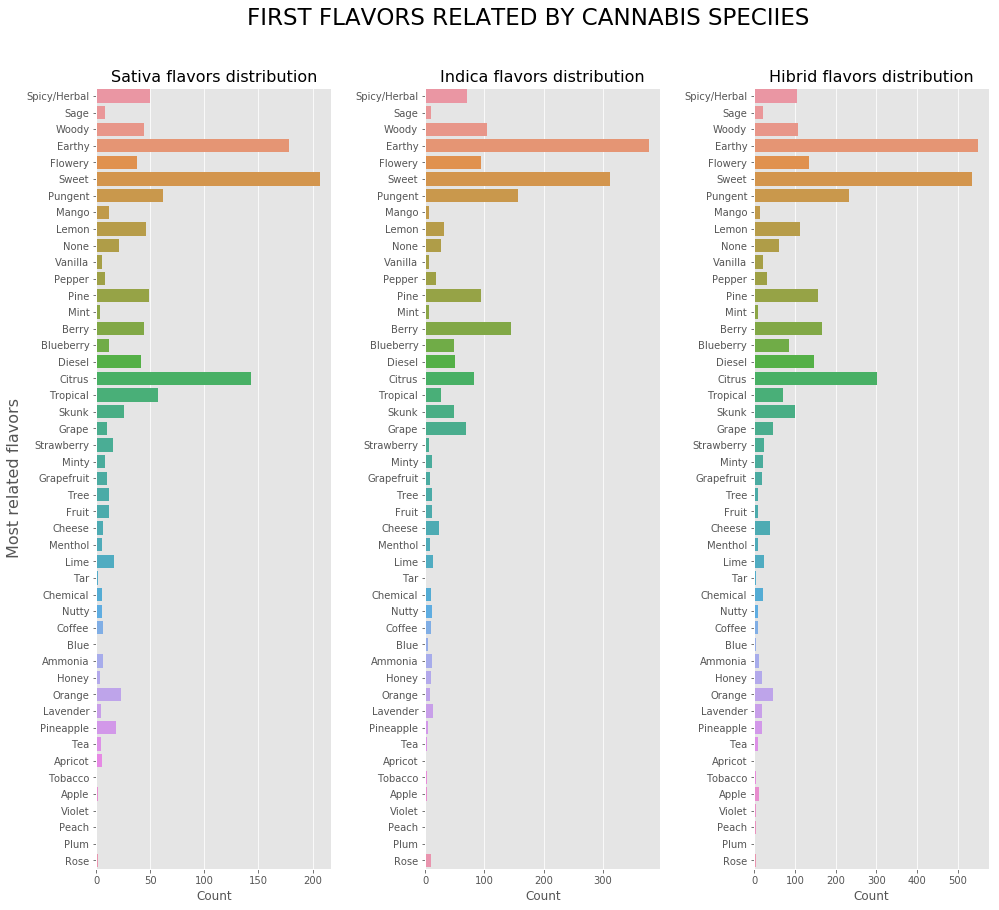

In [23]:
plt.figure(figsize=(16,14))
plt.suptitle('FIRST FLAVORS RELATED BY CANNABIS SPECIIES', fontsize=23)
plt.subplot(131)
g = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related flavors", fontsize=16)
g.set_title("Sativa flavors distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=indica_flavors, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica flavors distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=hibridas_flavors, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid flavors distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

Most frequent flavors in Sativas: <br>
Sweet: 207 <br>
Earthy: 178 <br>
Citrus: 143 <br>

Most frequent values in indicas <br>
Earthy: 378 <br>
Sweet: 312 <br>
Pungent: 157 <br> 
Berry: 145 <br>

The most frequent values in Hybrid type is: <br>
Earthy: 549<br>
Sweet: 534<br>
Citrus: 301   <br>

# Description Feature

In [24]:
# geting total words in review
strains['count_word'] = strains["Description"].apply(lambda x: len(str(x).split()))

# geting total letters in review
strains['count_letters'] = strains["Description"].apply(lambda x: len(str(x)))

# geting mean lenght of words
strains["mean_word_len"] = strains["Description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

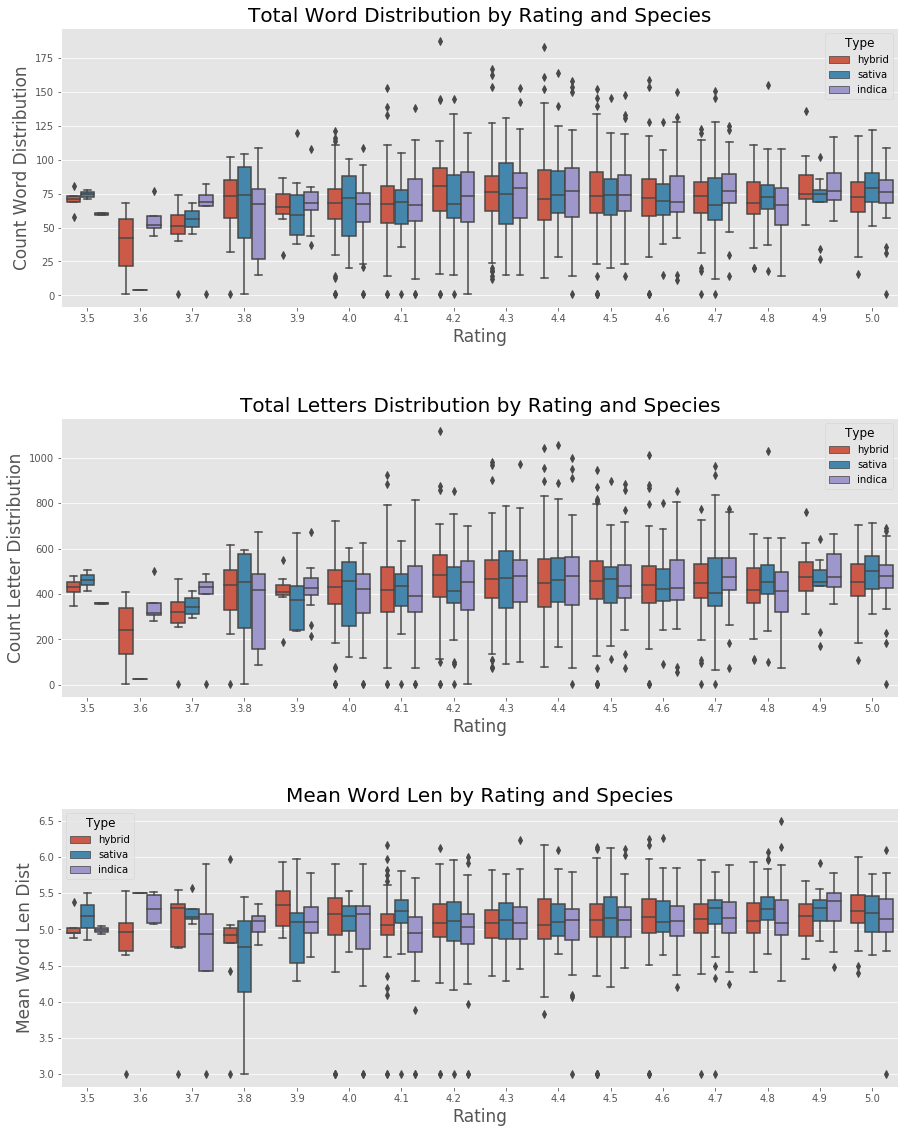

In [25]:
plt.figure(figsize=(15,17))

g = plt.subplot(311)
g = sns.boxplot(x='Rating', y='count_word', 
                hue='Type', data=strains[strains['Rating'] >= 3.5])
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Count Word Distribution", fontsize=17)
g.set_title("Total Word Distribution by Rating and Species", 
             fontsize=20)

g1 = plt.subplot(312)
g1 = sns.boxplot(x='Rating', y='count_letters', 
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g1.set_xlabel("Rating", fontsize=17)
g1.set_ylabel("Count Letter Distribution", fontsize=17)
g1.set_title("Total Letters Distribution by Rating and Species", 
             fontsize=20)

g2 = plt.subplot(313)
g2 = sns.boxplot(x='Rating', y='mean_word_len',
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g2.set_xlabel("Rating", fontsize=17)
g2.set_ylabel("Mean Word Len Dist", fontsize=17)
g2.set_title("Mean Word Len by Rating and Species", 
             fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.99)

plt.show()

Wow!!! It's a very interesting Chart.<br>
We can note that the patterns are differents based on Rating and Types, but it's not so different from each other.<br>
Would be very interesting to understand it further. <br>
> Now, let's see the word clouds


<h1>Description - Word Clouds</h1>

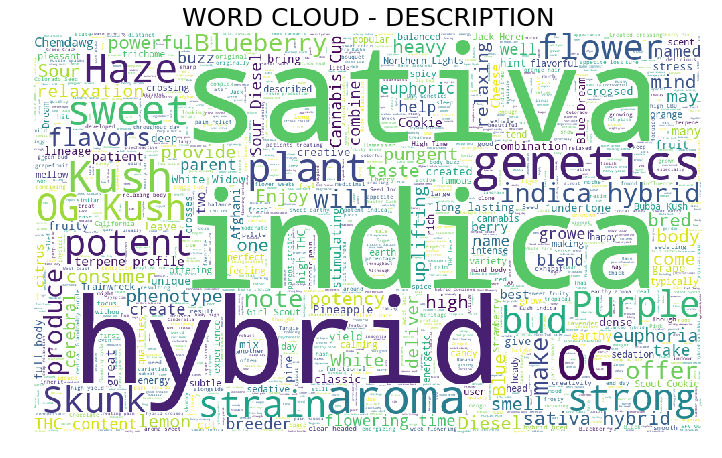

In [26]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Sativas</h2>

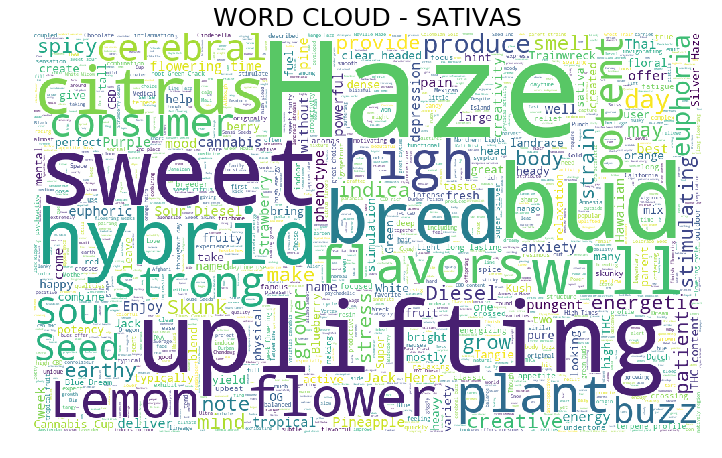

In [27]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Indicas</h2>

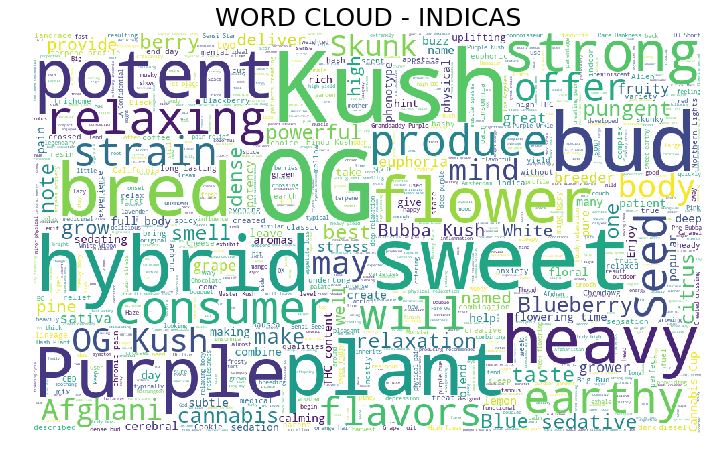

In [28]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Hybrids</h2>

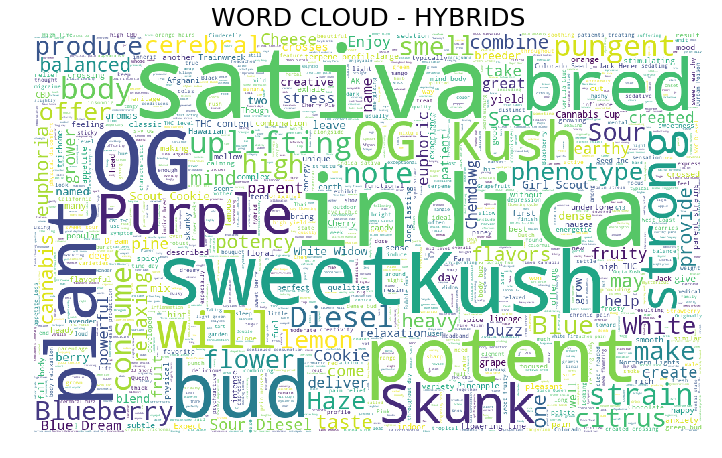

In [29]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

<h2>Word Cloud Rating 5 Strains</h2>

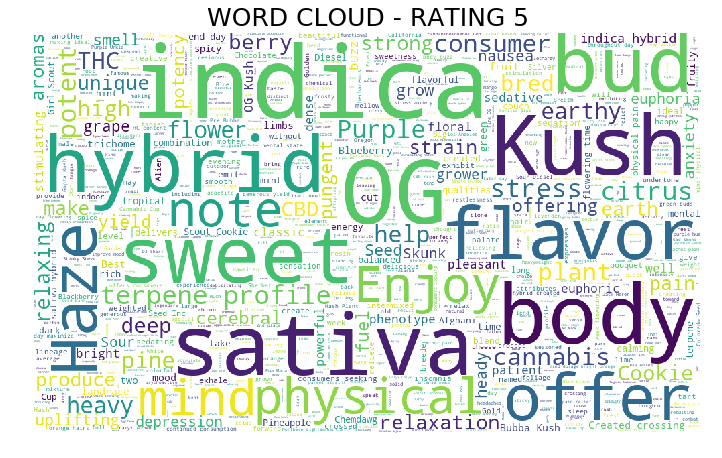

In [30]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()


very interesting and meaningful Word clouds 


<a id="Preprocess"></a> <br> 
# **7. Preprocessing dataset:** 

### Encoding the target

In [31]:
#Transformin the Type in numerical 
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]
# Now we have 3 numerical Types
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica

### Getting dummy features

In [32]:
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

### Concating dummies into principal df

In [33]:
#Concatenating the result and droping the used variables 
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 235)

<a id="Modeling"></a> <br> 
# **8. Importing Sklearn and Modeling:** 

In [34]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [35]:
# setting X and y
X = strains.drop("Type",1)
y = strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [36]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 234)
X_test Shape:  (706, 234)


We have a lot of features, and might could be important to us select the most important features.... So let's try do it. 

## Feature Selection

In [37]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

In [38]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)


X_important_train Shape:  (1645, 79)
X_important_test Shape:  (706, 79)


Very cool results. Now, let's start modeling

## Let's take a look at some models and compare their score

- We will explore the models with the best results

LogReg: 0.643164 (+/- 0.027327)
XGBClassifier: 0.615187 (+/- 0.015201)
KNN: 0.578764 (+/- 0.023495)
DecisionTreeClassifier: 0.517336 (+/- 0.019451)
RandomForestClassifier: 0.561120 (+/- 0.020409)
GradientBoostingClassifier: 0.630992 (+/- 0.012524)
RidgeClassifier: 0.637685 (+/- 0.020447)
BaggingRidgeClassifier: 0.579916 (+/- 0.028176)
ExtraTreesClassifier: 0.561662 (+/- 0.032482)


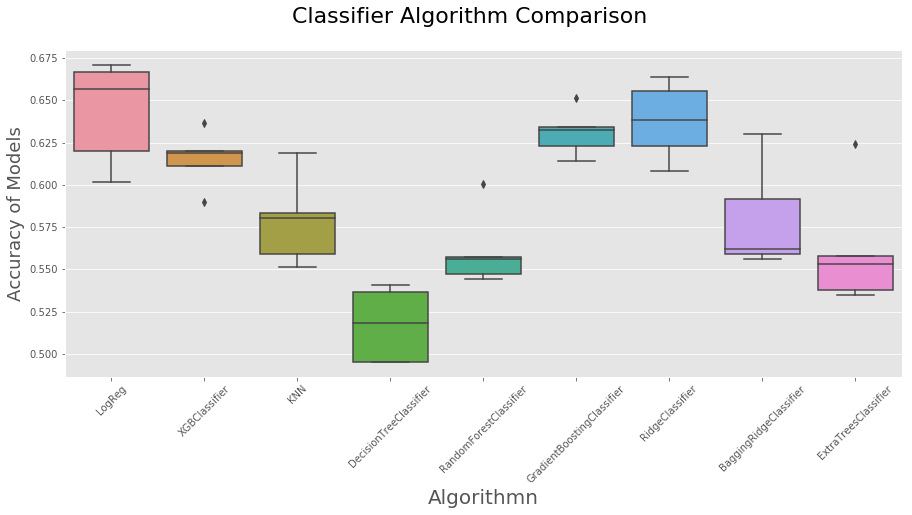

In [39]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

## I will select the top 3 models and set some hyperParameters to try increase their prediction power.
- The top 3 will be:
 -   GradientBoostingClassifier
 -   XGBClassifier
 -   RidgeClassifier

### I will start by the RidgeClassifier

In [40]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001], 
                'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = RidgeClassifier()
    
Ridge_model = GridSearchCV(estimator = ridge, param_grid=params_ridge, 
                           verbose=1, n_jobs = -1, 
                           cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   49.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [41]:
# Printing the Training Score
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_ )

Training score data: 
0.6772036474164134
Ridge Best Parameters: 
{'alpha': 0.001, 'solver': 'sparse_cg', 'tol': 0.001}


- We got a nice improvement in our model compared with the first model without HyperParameters.

### Now, let's Predict with this model

In [42]:
# Predicting with X_test
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6161473087818697
[[271  39  63]
 [ 87  36   6]
 [ 72   4 128]]
              precision    recall  f1-score   support

         0.0       0.63      0.73      0.67       373
         1.0       0.46      0.28      0.35       129
         2.0       0.65      0.63      0.64       204

    accuracy                           0.62       706
   macro avg       0.58      0.54      0.55       706
weighted avg       0.60      0.62      0.60       706



    Legend
    - 0 hybrid
    - 1 sativa
    - 2 Indica

Not so bad Results! 

The precision of Hybrid and Indica are the same and are higher than Sativa.... In Recall the Hybrid have the highest values. 

## Now, I will evaluate the best params to XGBoost model

In [43]:
param_xgb = {
 'n_estimators':[100,150,200],
 'max_depth':[3,4,5,6],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[.1, 0.2, 0.3,0.6,0.7,0.8],
 'colsample_bylevel':[0.2,0.6,0.8]
}

In [44]:
xgb = XGBClassifier()

xgb_model = GridSearchCV(estimator = xgb, 
                        param_grid = param_xgb, 
                        scoring='accuracy',
                        cv=3,
                        verbose = 1)

xgb_model.fit(X_important_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed: 33.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bylevel': [0.2, 0.6, 0.8],
                         'colsample_bytree': [0.1, 0.2, 0.3, 0.6, 0.7, 0.8],
                         'max_de

In [45]:
print("Results of the GridSearchCV of XGB: ")

print(xgb_model.best_params_)

print(xgb_model.score(X_important_train, y_train))

Results of the GridSearchCV of XGB: 
{'colsample_bylevel': 0.2, 'colsample_bytree': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150}
0.713677811550152


In [46]:
# let's set the best parameters to our model and fit again
xgb = XGBClassifier(colsample_bylevel=0.1, colsample_bytree=.8,
                    objective='multi', max_depth= 4, min_child_weight= 2, 
                    n_estimators= 150)

xgb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = xgb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.6331444759206799
[[295  26  52]
 [ 91  36   2]
 [ 83   5 116]]
              precision    recall  f1-score   support

         0.0       0.63      0.79      0.70       373
         1.0       0.54      0.28      0.37       129
         2.0       0.68      0.57      0.62       204

    accuracy                           0.63       706
   macro avg       0.62      0.55      0.56       706
weighted avg       0.63      0.63      0.62       706



    Legend of the prediction
    - 0 hybrid
    - 1 sativa
    - 2 Indica

This result was better than the Ridge Model. The recall of Hybrids increases and of Sativas decreases in XgBoost model

## Now let's fit and predict with Gradient Boosting Classifier model

In [47]:
param_gb = {
    'n_estimators':[50, 125, 150],
    'max_depth':[2,3,4],
    'max_features':[3,4,5,6],
    'learning_rate':[0.0001, 0.001, 0.01,0.1,1]
}

gb = GradientBoostingClassifier()

gb_model = GridSearchCV(estimator = gb, 
                        param_grid = param_gb, 
                        scoring='accuracy',
                        cv=5,
                        verbose = 1)

gb_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [48]:
print("Results of the GridSearchCV of Gradient Boosting Classifier: ")
print(gb_model.best_params_)
print(gb_model.score(X_important_train, y_train))

Results of the GridSearchCV of Gradient Boosting Classifier: 
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 4, 'n_estimators': 150}
0.7465045592705167


Cool! Better value than another models score. 

Now lets fit a model with this parameters and them do the prediction

In [49]:
gb = GradientBoostingClassifier(learning_rate=.1, max_depth= 3, max_features=3, n_estimators= 150)
gb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = gb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.6161473087818697
[[295  22  56]
 [106  22   1]
 [ 83   3 118]]
              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69       373
         1.0       0.47      0.17      0.25       129
         2.0       0.67      0.58      0.62       204

    accuracy                           0.62       706
   macro avg       0.58      0.51      0.52       706
weighted avg       0.60      0.62      0.59       706



:(

      Legend
     - 0 hybrid
     - 1 sativa
     - 2 Indica

Altough we got a highest score values in Gradient Boosting with train dataset, we got better results in model XGBoosting Classifier that gives the 62.75% of prediction 

###  will implement an simple TPOTClassifier, just to do a 

# TPOT

Tree-Based Pipeline Optimization Tool (TPOT) is using genetic programming to find the best performing ML pipelines, and it is built on top of scikit-learn.


In [50]:
# Importing the necessary library
from tpot import TPOTClassifier

Once your dataset is cleaned and ready to be used, TPOT will help you with the following steps of your ML pipeline:
- Feature preprocessing
- Feature construction and selection
- Model selection
- Hyperparameter optimization <br>

Once TPOT is done with its experimentation, it will provide you with the best performing pipeline.


TPOT is very user-friendly as it's similar to using scikit-learn's API, so it's very easy to implement an model. 

In [51]:
#Creating the model and setting some parameters 
tpot = TPOTClassifier(verbosity=2, max_time_mins=2, 
                      scoring='accuracy', 
                      max_eval_time_mins=2, 
                      memory='auto', generations=5, 
                      population_size=15, random_state=3,
                      early_stop = 3)


### Let's fit our automated model and see the output result

In [52]:
# Fitting the Auto TPOTClassifier 
tpot.fit(X_important_train, y_train)

# Evaluating the results
print("Accuracy is {}%".format(tpot.score(X_important_test, y_test) * 100))


2.0331148833333335 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(VarianceThreshold(input_matrix, threshold=0.005), C=20.0, dual=False, penalty=l1)
Accuracy is 61.756373937677054%


# Stay tuned because I will continue improving these models
## <font color="red">Pleeeease, don't forget to <b>UPVOTE</b> the kernel !!! =D </font>